# INTRODUCTION TO GEOPANDAS - 2

## By Kech_Cole

File contains geoprocessing tools such as union, intersection, symetrical difference, dissolve, buffer and difference using the geopandas package in python. 

In [1]:
# Import required modules
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
# Create geodataframes

# Provinces in kenya
prov = gpd.read_file(r"D:\GIS DATA\Kenya Gis Data\provinces.shp")


# Area of interest
aoi = gpd.read_file(r"D:\Programs\Python\Arc Py Scripts\Chapter 5 Map Scripting\.idea\AOI.shp")

# Railways in kenya
railway = gpd.read_file(r"D:\GIS DATA\Kenya Gis Data\railway.shp")


# Ploting Shapefiles

In [3]:
# Data attributes

print(prov.head(), '\n')

print(aoi.head(), '\n')

print(railway.head())


      FIRST_FIRS  COUNT                                           geometry
0        NAIROBI      1  POLYGON ((36.69444 -1.25622, 36.69542 -1.25609...
1          COAST      7  MULTIPOLYGON (((39.61808 -3.94914, 39.61830 -3...
2  NORTH EASTERN      3  POLYGON ((40.97104 0.45897, 40.97081 0.39238, ...
3        WESTERN      8  POLYGON ((35.11957 0.83957, 35.11972 0.83924, ...
4         NYANZA     12  MULTIPOLYGON (((34.45863 -0.21394, 34.45825 -0... 

   Id                                           geometry
0   0  POLYGON ((33.89928 2.79680, 39.59208 2.67943, ... 

  MAPKEY                                           geometry
0    186  LINESTRING (39.70174 -4.02642, 39.65831 -3.999...
1    189  LINESTRING (35.18823 0.58193, 35.19040 0.61638...
2    18A  LINESTRING (36.34243 -0.49387, 36.35389 -0.474...
3    18B  LINESTRING (35.87031 -0.16539, 35.89487 -0.138...
4    18C  LINESTRING (36.83798 -1.27486, 36.87765 -1.263...


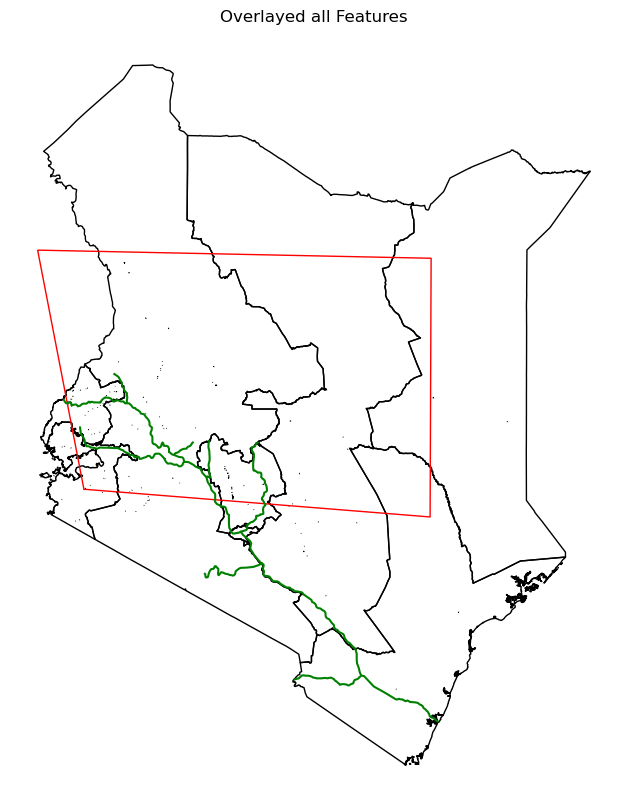

In [4]:
# Overlay each of the above features in a single plot

fig, ax = plt.subplots(figsize=(10, 10))          # Unpack tuple into fig and ax variables
prov.plot(ax = ax,                  # First plot, contains provinces
          color = 'none',            # Make visible
          edgecolor = "black")       # Borderline colour
aoi.plot(ax = ax, color = 'none', edgecolor = "red")                         # Second plot, contains area of interest
railway.plot(ax = ax, color = "green")                                       # Third plot, contains railways 
ax.set_axis_off()                                # Remove boderline 
plt.title('Overlayed all Features')              # Add title
plt.show()


# Geoprocessing operations

## 1. Intersection

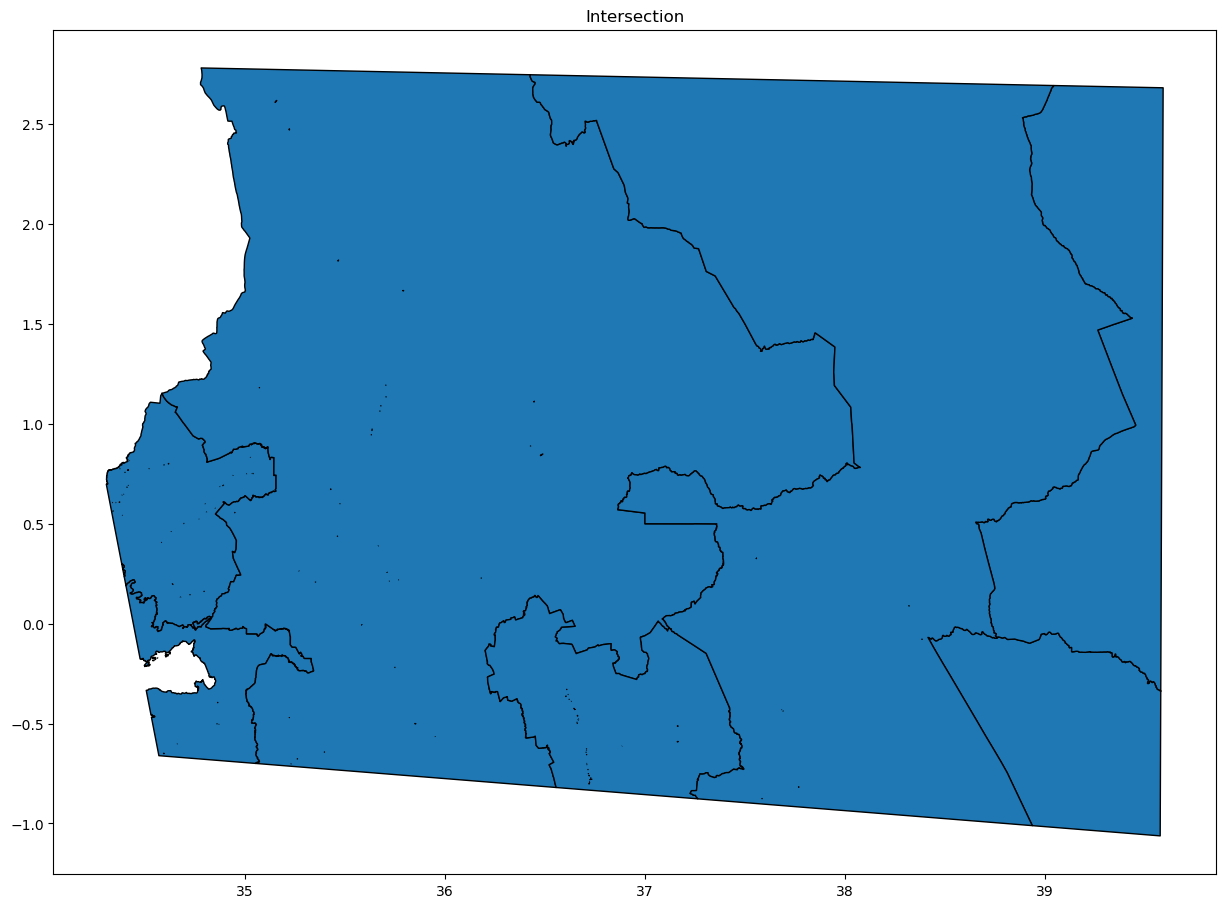

In [5]:
# Input geometries that overlap will form an output feature class while preserving attributes for all layers such as boundaries

intersection = gpd.overlay(prov, aoi, how = "intersection")
intersection.plot(edgecolor = "black",figsize=(15, 12))
plt.title('Intersection')
plt.show()


In [6]:
# View data

intersection

,FIRST_FIRS,COUNT,Id,geometry
0,COAST,7,0,"POLYGON ((38.93003 -0.99458, 38.92351 -0.98094..."
1,NORTH EASTERN,3,0,"POLYGON ((39.58004 -0.33862, 39.57999 -0.33740..."
2,WESTERN,8,0,"POLYGON ((35.11972 0.83924, 35.11995 0.83889, ..."
3,NYANZA,12,0,"MULTIPOLYGON (((34.57809 -0.14133, 34.57747 -0..."
4,RIFT VALLEY,18,0,"POLYGON ((35.05226 -0.69918, 35.05282 -0.69895..."
5,CENTRAL,7,0,"POLYGON ((36.35572 -0.37788, 36.33458 -0.38824..."
6,EASTERN,13,0,"POLYGON ((37.42234 -0.41845, 37.30650 -0.14935..."


## 2. Union

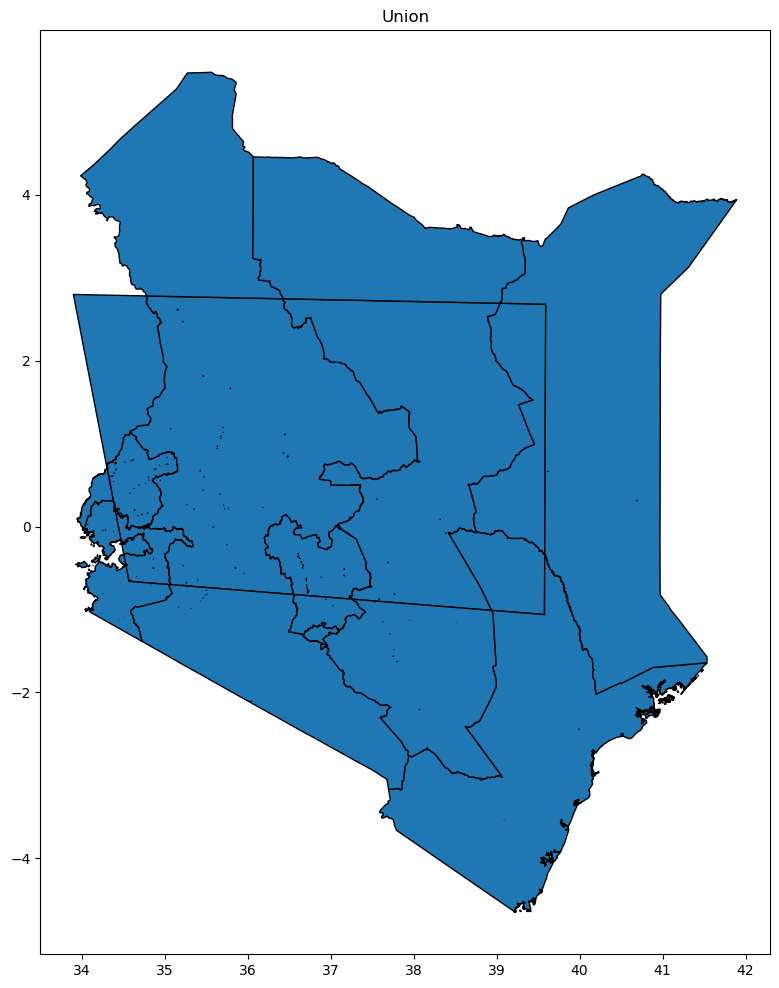

In [7]:
# 2. Union. Combines features into a single composite layer while preserving the boundaries and other attribute from all features

union = gpd.overlay(prov, aoi, how = "union")
union.plot(edgecolor = "black", figsize=(15, 12))
plt.title('Union')
plt.show()


In [8]:
# View data

union

,FIRST_FIRS,COUNT,Id,geometry
0,COAST,7.0,0.0,"POLYGON ((38.93003 -0.99458, 38.92351 -0.98094..."
1,NORTH EASTERN,3.0,0.0,"POLYGON ((39.58004 -0.33862, 39.57999 -0.33740..."
2,WESTERN,8.0,0.0,"POLYGON ((35.11972 0.83924, 35.11995 0.83889, ..."
3,NYANZA,12.0,0.0,"MULTIPOLYGON (((34.57809 -0.14133, 34.57747 -0..."
4,RIFT VALLEY,18.0,0.0,"POLYGON ((35.05226 -0.69918, 35.05282 -0.69895..."
5,CENTRAL,7.0,0.0,"POLYGON ((36.35572 -0.37788, 36.33458 -0.38824..."
6,EASTERN,13.0,0.0,"POLYGON ((37.42234 -0.41845, 37.30650 -0.14935..."
7,NAIROBI,1.0,NaN,"POLYGON ((36.69444 -1.25622, 36.69542 -1.25609..."
8,COAST,7.0,NaN,"MULTIPOLYGON (((39.62200 -3.92893, 39.62203 -3..."
9,NORTH EASTERN,3.0,NaN,"POLYGON ((40.97081 0.39238, 40.96979 0.00382, ..."


## 3. Symetric Difference

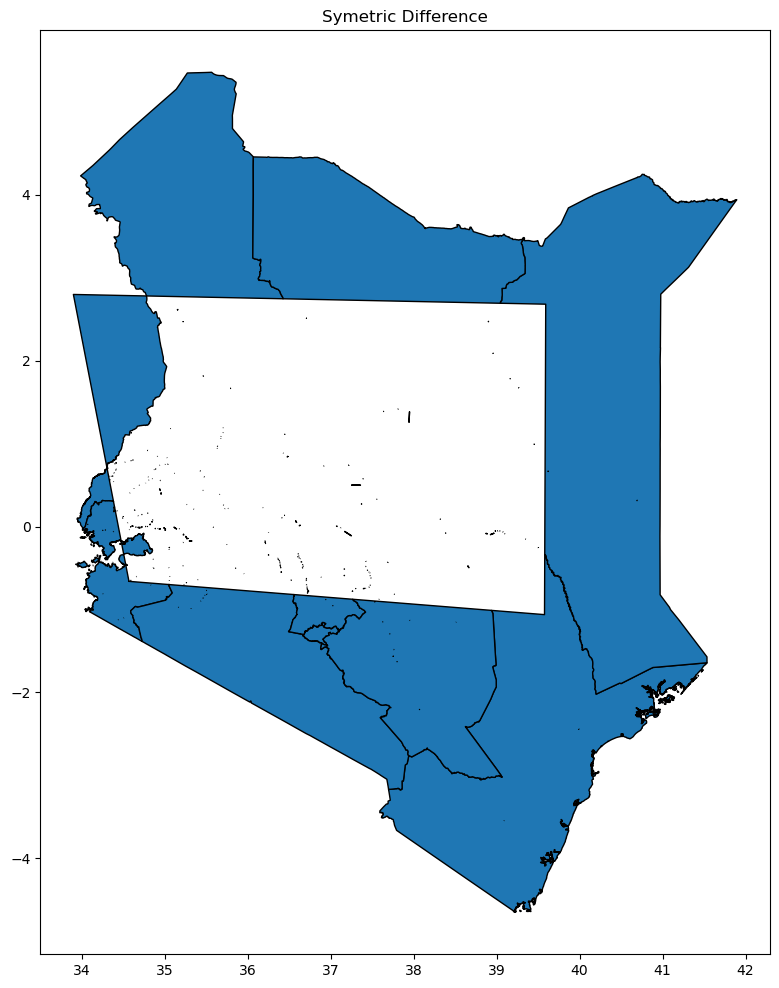

In [9]:
# 3. Symmetric difference. Two overlapping layers are used to create one feature class that does not include the layer 
# where both layers existed. Its the opposite of intersect.

sym_diff = gpd.overlay(prov, aoi, how = "symmetric_difference")
sym_diff.plot(edgecolor = "black", figsize = (15,12))
plt.title('Symetric Difference')
plt.show()


In [10]:
# View data

sym_diff

,FIRST_FIRS,COUNT,Id,geometry
0,NAIROBI,1.0,NaN,"POLYGON ((36.69444 -1.25622, 36.69542 -1.25609..."
1,COAST,7.0,NaN,"MULTIPOLYGON (((39.62200 -3.92893, 39.62203 -3..."
2,NORTH EASTERN,3.0,NaN,"POLYGON ((40.97081 0.39238, 40.96979 0.00382, ..."
3,WESTERN,8.0,NaN,"MULTIPOLYGON (((34.40380 0.18807, 34.40099 0.1..."
4,NYANZA,12.0,NaN,"MULTIPOLYGON (((35.05097 -0.69992, 35.05040 -0..."
5,RIFT VALLEY,18.0,NaN,"MULTIPOLYGON (((34.99050 -0.89316, 34.99431 -0..."
6,CENTRAL,7.0,NaN,"POLYGON ((37.27093 -0.88582, 37.27926 -0.89472..."
7,EASTERN,13.0,NaN,"MULTIPOLYGON (((36.42568 2.74694, 36.42480 2.7..."
8,NaN,NaN,0.0,"MULTIPOLYGON (((39.58024 -0.33938, 39.58024 -0..."


## 4. Difference

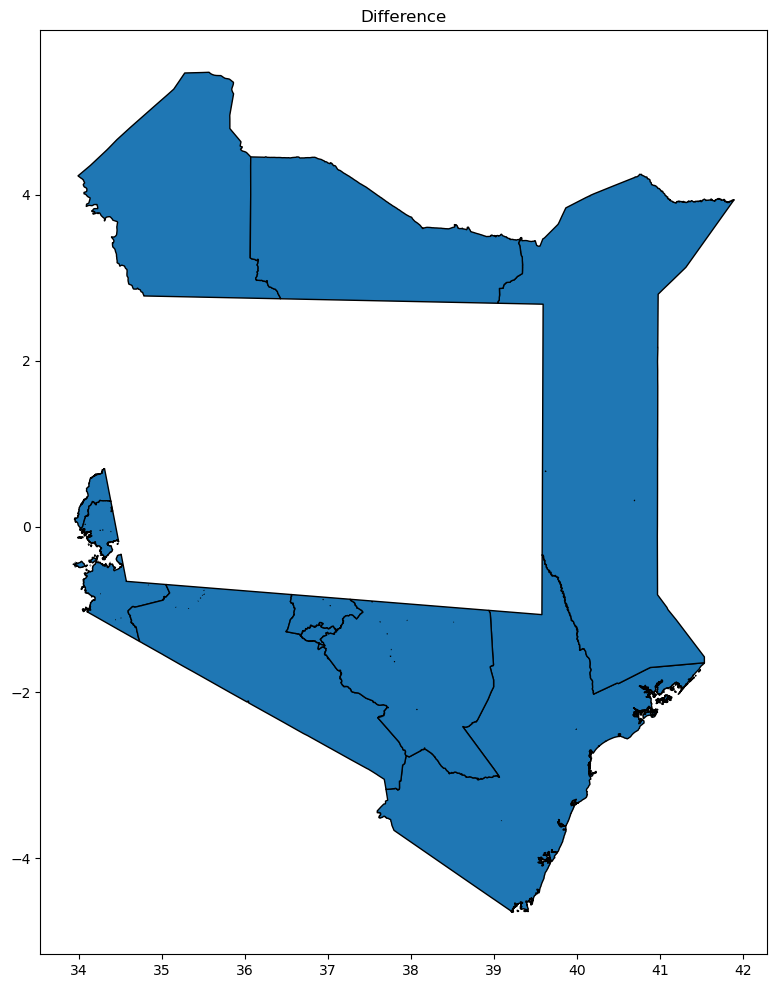

In [11]:
# Also called erase, it removes areas that overlap with the erasing feature, input layer will be erased, everything that is 
# outside the erasing layer ends as output layer. The second layer argument is the erasing feature.

difference = gpd.overlay(prov, aoi, how = "difference")    
difference.plot(edgecolor = "BLACK", figsize = (15,12))
plt.title('Difference')
plt.show()


In [12]:
# View data

difference

,FIRST_FIRS,COUNT,geometry
0,NAIROBI,1,"POLYGON ((36.69444 -1.25622, 36.69542 -1.25609..."
1,COAST,7,"MULTIPOLYGON (((39.62200 -3.92893, 39.62203 -3..."
2,NORTH EASTERN,3,"POLYGON ((40.97081 0.39238, 40.96979 0.00382, ..."
3,WESTERN,8,"MULTIPOLYGON (((34.40380 0.18807, 34.40099 0.1..."
4,NYANZA,12,"MULTIPOLYGON (((35.05097 -0.69992, 35.05040 -0..."
5,RIFT VALLEY,18,"MULTIPOLYGON (((34.99050 -0.89316, 34.99431 -0..."
6,CENTRAL,7,"POLYGON ((37.27093 -0.88582, 37.27926 -0.89472..."
7,EASTERN,13,"MULTIPOLYGON (((36.42568 2.74694, 36.42480 2.7..."


## 5. Dissolve

In [13]:
# First create a union and add a column with similar attribute that will be used as a basis field for merging

# Dissolve unifies adjacent boundaries based on a common attribute value, boundaries melted to one.
# Used for generalisation and simplification to more complex boundaries.

union = gpd.overlay(prov, aoi, how = "union")     # Union operation
union["SIMILAR_ATTRIBUTE"] = 1                    # Create field called SIMILAR_ATTRIBUTE and assign value 1

# Check if new column is added
print(union)   

       FIRST_FIRS  COUNT   Id  \
0           COAST    7.0  0.0   
1   NORTH EASTERN    3.0  0.0   
2         WESTERN    8.0  0.0   
3          NYANZA   12.0  0.0   
4     RIFT VALLEY   18.0  0.0   
5         CENTRAL    7.0  0.0   
6         EASTERN   13.0  0.0   
7         NAIROBI    1.0  NaN   
8           COAST    7.0  NaN   
9   NORTH EASTERN    3.0  NaN   
10        WESTERN    8.0  NaN   
11         NYANZA   12.0  NaN   
12    RIFT VALLEY   18.0  NaN   
13        CENTRAL    7.0  NaN   
14        EASTERN   13.0  NaN   
15            NaN    NaN  0.0   

                                             geometry  SIMILAR_ATTRIBUTE  
0   POLYGON ((38.93003 -0.99458, 38.92351 -0.98094...                  1  
1   POLYGON ((39.58004 -0.33862, 39.57999 -0.33740...                  1  
2   POLYGON ((35.11972 0.83924, 35.11995 0.83889, ...                  1  
3   MULTIPOLYGON (((34.57809 -0.14133, 34.57747 -0...                  1  
4   POLYGON ((35.05226 -0.69918, 35.05282 -0.69895...          

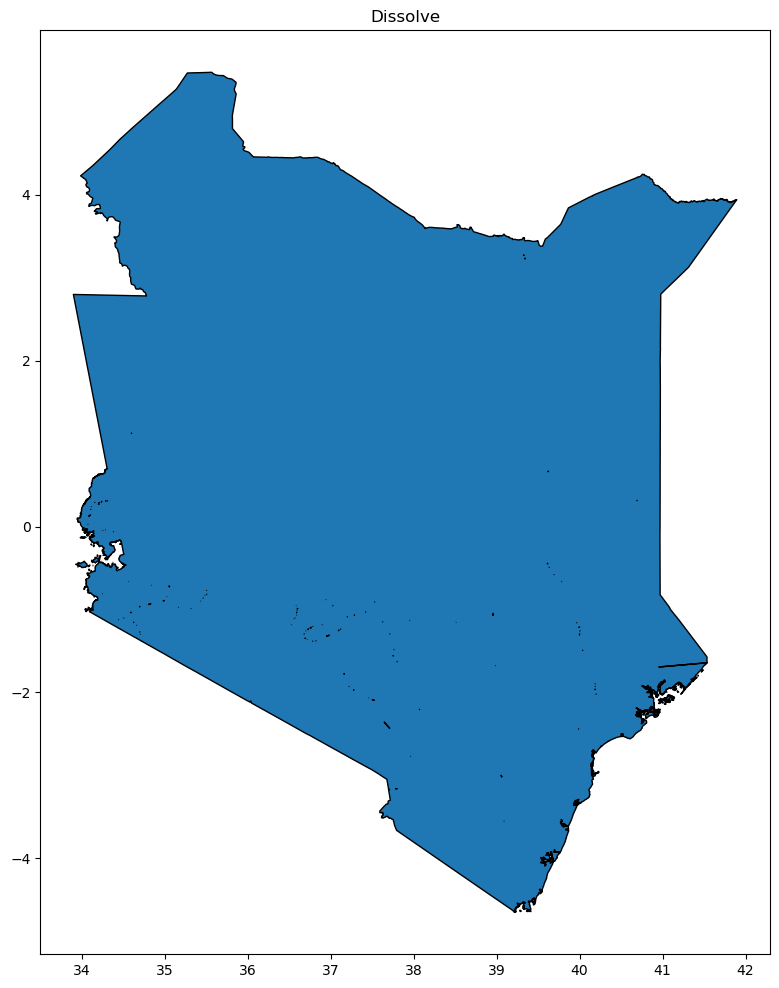

In [14]:
# Dissolve the union based on a common attribute column. All features will aggregate to form a single object, former provinces
# boundary as well as area of interest will merge.

dissolved = union.dissolve(by = "SIMILAR_ATTRIBUTE")
dissolved.plot(edgecolor = "black", figsize = (15,12))
plt.title('Dissolve')
plt.show()

In [15]:
# View data 

dissolved

,geometry,FIRST_FIRS,COUNT,Id
SIMILAR_ATTRIBUTE,,,,
1,"MULTIPOLYGON (((34.72936 -1.38564, 34.72852 -1...",COAST,7.0,0.0


## 6. Buffer

In [16]:
# Buffer is proximity tool creates a polygon feature class at a set distance surrounding features. 
# This operation must be done on a geo series dataframe

# Convert coordinates from geographic to a planar system such as Web Mercator since buffer radius argument is in meters.

prov = prov.to_crs(epsg=3857)
railway = railway.to_crs(epsg=3857)

In [17]:
# Check type of input features 

print("railway data type - ", type(railway))         
print("railway geometry column type - ", type(railway["geometry"]))     


railway data type -  <class 'geopandas.geodataframe.GeoDataFrame'>
railway geometry column type -  <class 'geopandas.geoseries.GeoSeries'>


In [18]:
# Since geometry column is geoseries dataframe, conduct a buffer analysis with buffer distance of 10km from the railway line

buffer_20000m = railway["geometry"].buffer(distance = 10000)

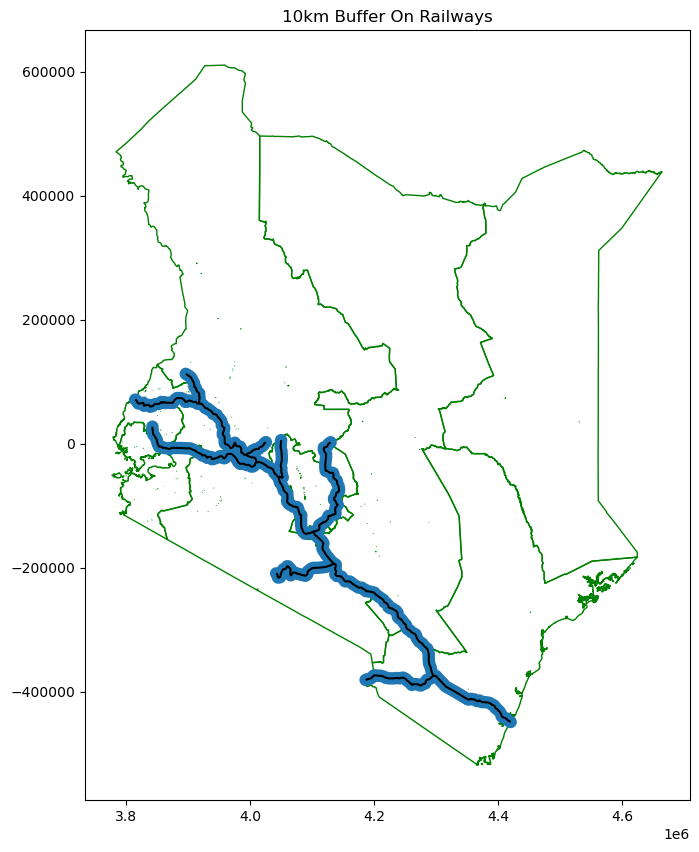

In [19]:
# Overlay plots

fig, ax = plt.subplots(figsize = (15, 10))
prov.plot(ax = ax,                                           # Provinces plot
          color = "none",
          edgecolor = "green")      
buffer_20000m.plot(ax = ax)                                  # Buffer plot
railway.plot(ax = ax,color = "black")                        # Railways plot
plt.title('10km Buffer On Railways')
plt.show()


## 7. Centroid

In [20]:
# Centroid analysis is usually conducted to determine geometric centrality of features,
# it provides the location of center of gravity and sometimes falls outside of a feature espeacially for irregular shaped features.

# Create a centroid object for each province and overlay provinces shapefile
# Check type of geometry column data, must be a geoseries 

print('railway geometry column type -',type(prov['geometry']))


railway geometry column type - <class 'geopandas.geoseries.GeoSeries'>


In [21]:
# Create centroid object

centroid = prov['geometry'].centroid

# Attribute data
print('Center coordinates \n',centroid.head(8))


Center coordinates 
 0    POINT (4104100.338 -143701.065)
1    POINT (4377204.546 -276542.391)
2     POINT (4476981.187 147539.989)
3      POINT (3851341.001 56659.218)
4     POINT (3846585.912 -55998.718)
5     POINT (3997806.933 138393.212)
6     POINT (4104070.802 -65235.423)
7     POINT (4219423.082 126845.081)
dtype: geometry


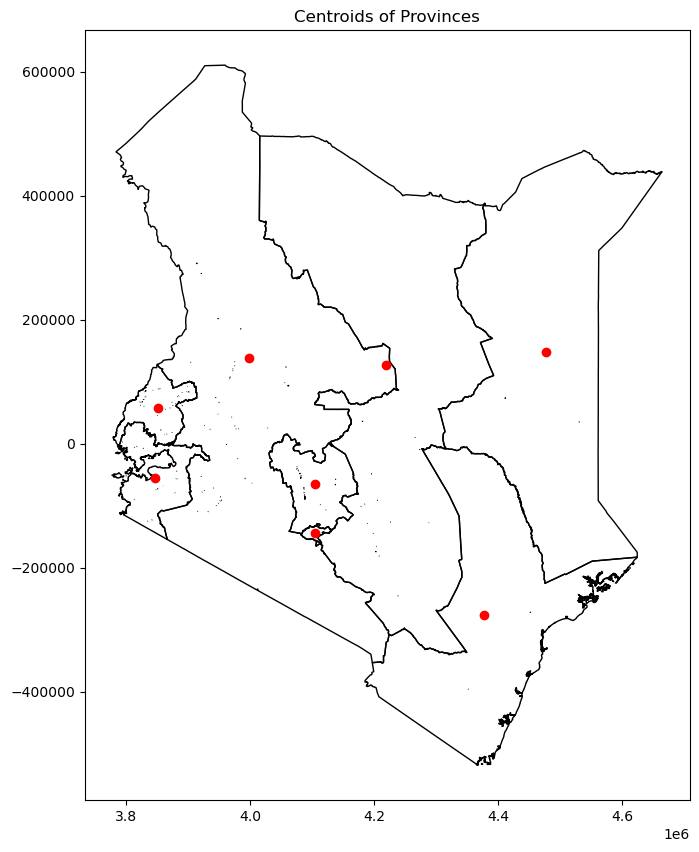

In [22]:
# Overlay provinces with centroid features

fig, ax = plt.subplots(figsize = (15, 10))
prov.plot(ax = ax, 
          color = "NONE",        # Make province map hollow
          edgecolor = "black")   # Boundary colour
centroid.plot(ax = ax,           
              color = "RED")     # Centroid object colour
plt.title('Centroids of Provinces')
plt.show()


References
1. geopandas.org
2. gisgeography.com/geoprocessing-tools